In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from PIL import Image
import seaborn as sns
import pandas as pd

In [2]:
testdata_path = "/Users/harshkotadiya/CodeSpace/PROJECTS/EDA_DPL/My Dataset/test"
traindata_path = "/Users/harshkotadiya/CodeSpace/PROJECTS/EDA_DPL/My Dataset/train"
traindata_plain_path = "/Users/harshkotadiya/CodeSpace/PROJECTS/EDA_DPL/My Dataset/train/Plain"
traindata_pothole_path = "/Users/harshkotadiya/CodeSpace/PROJECTS/EDA_DPL/My Dataset/train/Pothole"

In [3]:
img_path = [os.path.join(traindata_plain_path,filename) for filename in os.listdir(traindata_plain_path)] + \
    [os.path.join(traindata_pothole_path,filename) for filename in os.listdir(traindata_pothole_path)]

In [4]:
img_class = ["Plain" if "plain" in path.lower() else "Pothole" if "pothole" in path.lower() else "Unknown" for path in img_path]

In [5]:
data = {"path":img_path,"class":img_class}
df=pd.DataFrame(data)

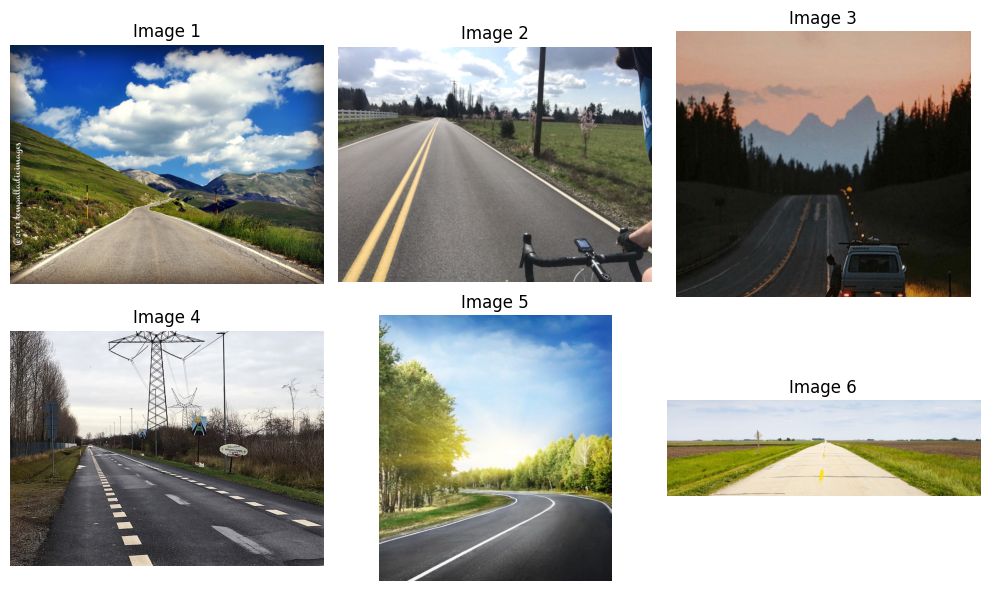

In [27]:
Plain_images = df[df['class'] == 'Plain'].tail(6) 
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
for i, (index, row) in enumerate(Plain_images.iterrows()):
    img = cv2.cvtColor(cv2.imread(row['path']), cv2.COLOR_BGR2RGB)
    ax = axes[i // 3, i % 3]  # Calculate the subplot position
    ax.imshow(img)
    ax.set_title(f"Image {i+1}")
    ax.axis("off")

plt.tight_layout()
plt.show()

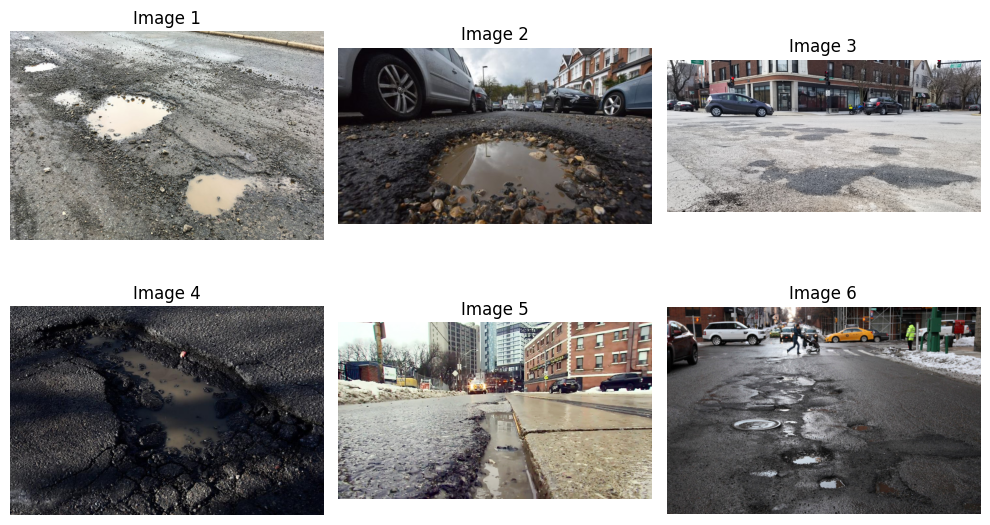

In [25]:
pothole_images = df[df['class'] == 'Pothole'].head(6)  # Adjust the number 6 as needed

# Create subplots for the selected images
fig, axes = plt.subplots(2, 3, figsize=(10, 6))  # 2 rows and 3 columns for 6 images

for i, (index, row) in enumerate(pothole_images.iterrows()):
    img = cv2.cvtColor(cv2.imread(row['path']), cv2.COLOR_BGR2RGB)
    ax = axes[i // 3, i % 3]  # Calculate the subplot position
    ax.imshow(img)
    ax.set_title(f"Image {i+1}")
    ax.axis("off")

plt.tight_layout()
plt.show()

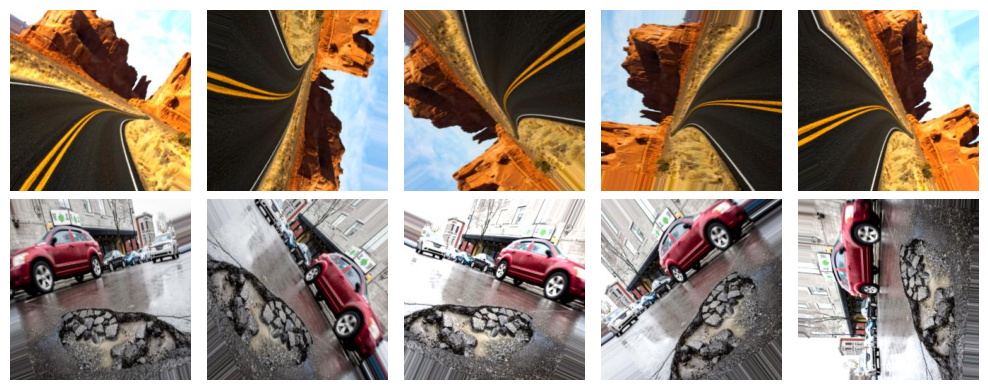

In [34]:
from PIL import Image
import numpy as np

paths1 = ["../Dataset/Agumented_Images_256/Plain/2.Utah-road-near-Arches-National-Parkaugmented1.jpg",
          "../Dataset/Agumented_Images_256/Plain/2.Utah-road-near-Arches-National-Parkaugmented2.jpg",
          "../Dataset/Agumented_Images_256/Plain/2.Utah-road-near-Arches-National-Parkaugmented3.jpg",
          "../Dataset/Agumented_Images_256/Plain/2.Utah-road-near-Arches-National-Parkaugmented4.jpg",
          "../Dataset/Agumented_Images_256/Plain/2.Utah-road-near-Arches-National-Parkaugmented5.jpg",]
paths2 = ["../Dataset/Agumented_Images_256/Pothole/363.pothole02augmented1.jpg",
          "../Dataset/Agumented_Images_256/Pothole/363.pothole02augmented2.jpg",
          "../Dataset/Agumented_Images_256/Pothole/363.pothole02augmented3.jpg",
          "../Dataset/Agumented_Images_256/Pothole/363.pothole02augmented4.jpg",
          "../Dataset/Agumented_Images_256/Pothole/363.pothole02augmented5.jpg"]

plt.figure(figsize=(10,4))
# plt.suptitle("Plain Images")
plt.subplot(2,5,1), plt.imshow(np.asarray(Image.open(paths1[0]))), plt.axis("off")
plt.subplot(2,5,2), plt.imshow(np.asarray(Image.open(paths1[1]))), plt.axis("off")
plt.subplot(2,5,3), plt.imshow(np.asarray(Image.open(paths1[2]))), plt.axis("off")
plt.subplot(2,5,4), plt.imshow(np.asarray(Image.open(paths1[3]))), plt.axis("off")
plt.subplot(2,5,5), plt.imshow(np.asarray(Image.open(paths1[4]))), plt.axis("off")

# plt.figure(figsize=(6,6))
# plt.suptitle("Plain Images")
plt.subplot(2,5,6), plt.imshow(np.asarray(Image.open(paths2[0]))), plt.axis("off")
plt.subplot(2,5,7), plt.imshow(np.asarray(Image.open(paths2[1]))), plt.axis("off")
plt.subplot(2,5,8), plt.imshow(np.asarray(Image.open(paths2[2]))), plt.axis("off")
plt.subplot(2,5,9), plt.imshow(np.asarray(Image.open(paths2[3]))), plt.axis("off")
plt.subplot(2,5,10), plt.imshow(np.asarray(Image.open(paths2[4]))), plt.axis("off")

plt.tight_layout()

In [ ]:
class_counts = df['class'].value_counts()
ax = class_counts.plot(kind='bar')
plt.title('Image Counts')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
for i, count in enumerate(class_counts):
    ax.annotate(str(count), (i, count), ha='center', va='bottom')
plt.show()


C:\Users\devbh\AppData\Local\Temp\ipykernel_24004\689300343.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=frequencies, palette=custom_palette)


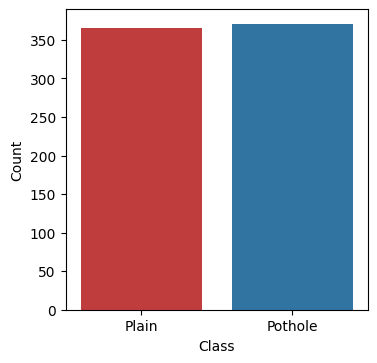

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a custom color palette
custom_palette = sns.color_palette(['#d62728', '#1f77b4'])

# Data
classes = ['Plain', 'Pothole']
frequencies = [365, 371]

# Creating bar chart with custom colors
plt.figure(figsize=(3.9, 3.9))
sns.barplot(x=classes, y=frequencies, palette=custom_palette)

# Adding labels and title
plt.xlabel('Class')
plt.ylabel('Count')

# Display the chart
plt.show()


In [6]:
def avg_intensities(image_path):
    image = cv2.imread(image_path)
    if image is not None:
        b_array, g_array, r_array = cv2.split(image)
        b = b_array.mean()
        g = g_array.mean()
        r = r_array.mean()
        return b, g, r
    else:
        return np.nan,np.nan,np.nan

In [7]:
df[['blue', 'green', 'red']] = df['path'].apply(lambda x: pd.Series(avg_intensities(x)))


libpng warning: iCCP: profile 'ICC Profile': 1000000h: invalid rendering intent
/var/folders/fg/gzz9cvdx7zzf2lcwf7m0y6m00000gn/T/ipykernel_1279/3103372233.py:1: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  df[['blue', 'green', 'red']] = df['path'].apply(lambda x: pd.Series(avg_intensities(x)))


In [8]:
df.isna().sum()

path     0
class    0
blue     2
green    2
red      2
dtype: int64

In [9]:
# Print the rows where any column contains a null value
print(df[df.isna().any(axis=1)]['path'])


62     /Users/harshkotadiya/CodeSpace/PROJECTS/EDA_DP...
230    /Users/harshkotadiya/CodeSpace/PROJECTS/EDA_DP...
Name: path, dtype: object


In [10]:
df.dropna(inplace=True)#removing files which are not images .DS_store etc
df

,path,class,blue,green,red
0,/Users/harshkotadiya/CodeSpace/PROJECTS/EDA_DP...,Plain,61.405064,116.073515,98.389503
1,/Users/harshkotadiya/CodeSpace/PROJECTS/EDA_DP...,Plain,149.034417,149.389912,140.481572
2,/Users/harshkotadiya/CodeSpace/PROJECTS/EDA_DP...,Plain,134.955080,132.537108,124.284234
3,/Users/harshkotadiya/CodeSpace/PROJECTS/EDA_DP...,Plain,72.771244,120.945283,118.569549
4,/Users/harshkotadiya/CodeSpace/PROJECTS/EDA_DP...,Plain,123.150179,154.386952,162.606779
...,...,...,...,...,...
719,/Users/harshkotadiya/CodeSpace/PROJECTS/EDA_DP...,Pothole,147.449627,150.378823,152.562125
720,/Users/harshkotadiya/CodeSpace/PROJECTS/EDA_DP...,Pothole,95.291343,101.003827,105.058201
721,/Users/harshkotadiya/CodeSpace/PROJECTS/EDA_DP...,Pothole,78.776067,91.478444,92.407856
722,/Users/harshkotadiya/CodeSpace/PROJECTS/EDA_DP...,Pothole,107.018385,113.621921,119.154407


In [11]:
df.isna().sum()

path     0
class    0
blue     0
green    0
red      0
dtype: int64

/Users/harshkotadiya/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/harshkotadiya/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/harshkotadiya/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/harshkotadiya/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

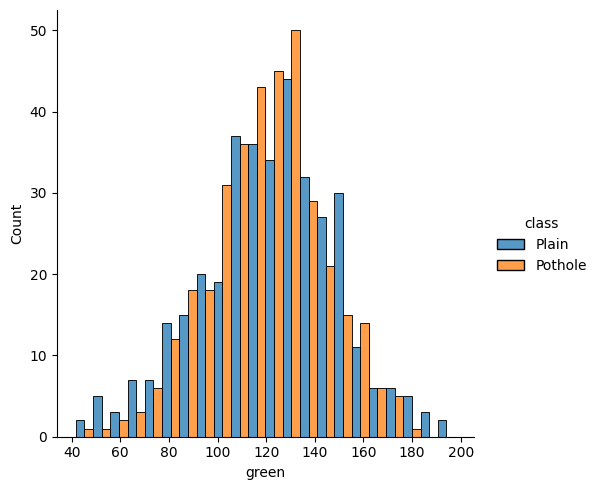

In [12]:
sns.displot(data=df, x="green", hue="class",multiple="dodge")

/Users/harshkotadiya/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/harshkotadiya/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/harshkotadiya/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/harshkotadiya/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

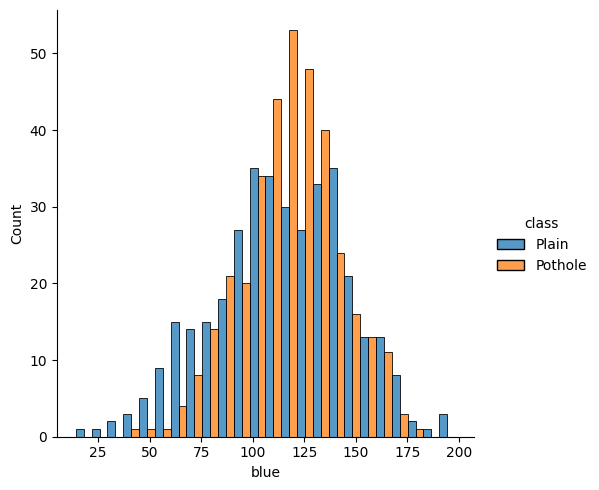

In [13]:
sns.displot(data=df, x="blue", hue="class",multiple="dodge")

/Users/harshkotadiya/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/harshkotadiya/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/harshkotadiya/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/harshkotadiya/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

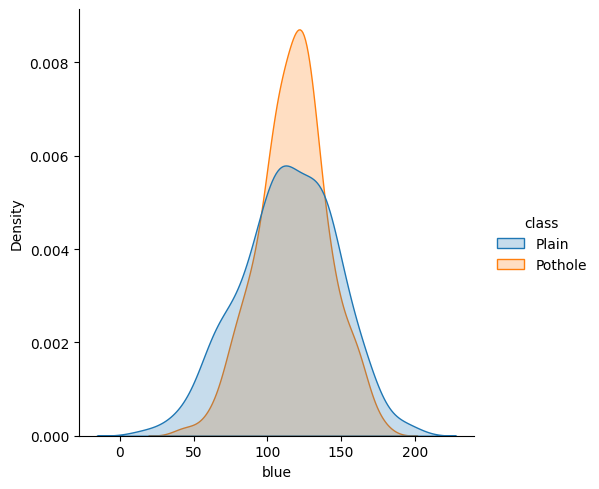

In [14]:
sns.displot(data=df, x="blue", hue="class",kind="kde",fill=True)

/Users/harshkotadiya/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/harshkotadiya/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/harshkotadiya/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/harshkotadiya/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

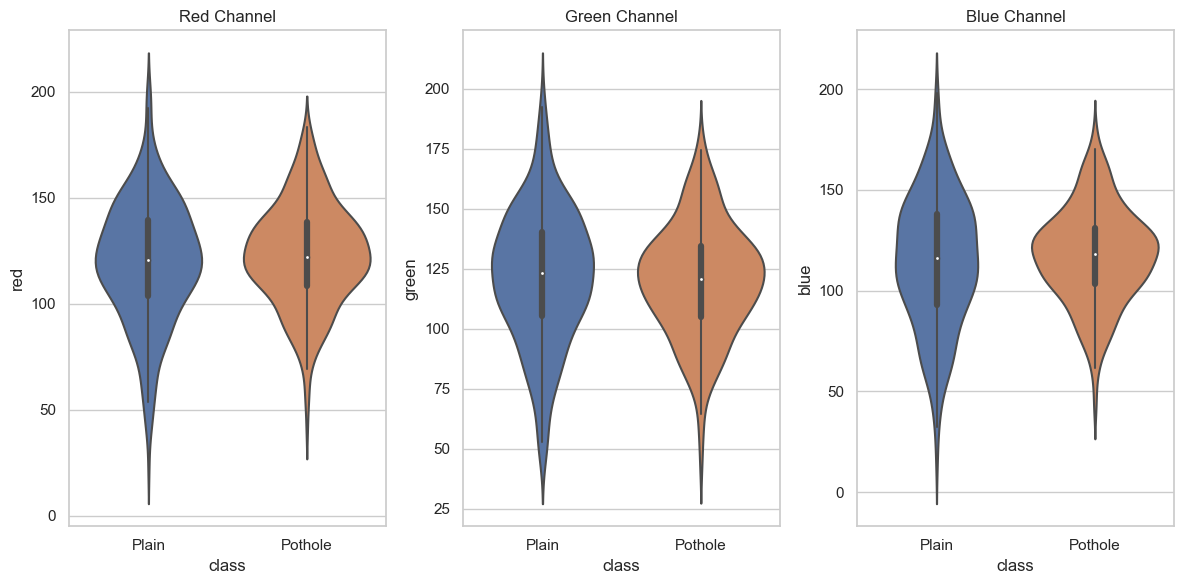

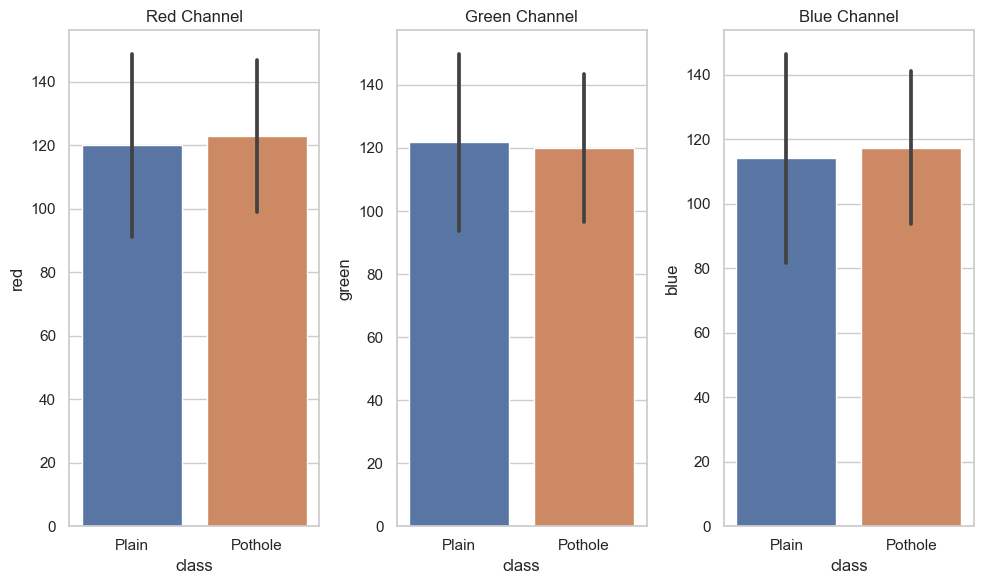

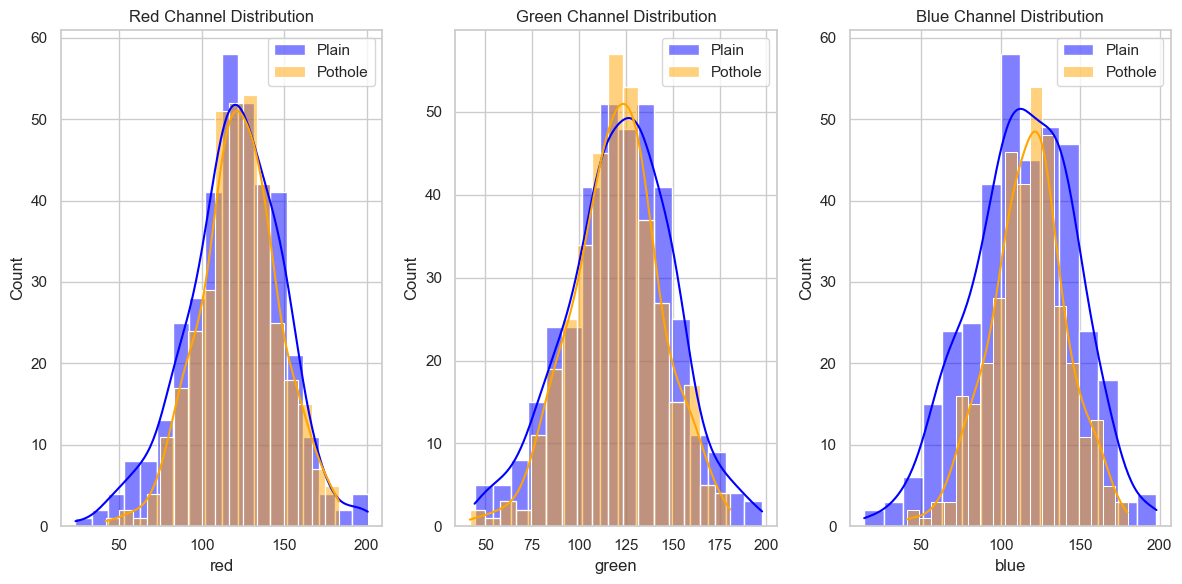

In [35]:
plain_data = df[df['class'] == 'Plain']
pothole_data = df[df['class'] == 'Pothole']

# Violin plot for RGB values comparison
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.violinplot(x='class', y='red', data=df)
plt.title('Red Channel')

plt.subplot(1, 3, 2)
sns.violinplot(x='class', y='green', data=df)
plt.title('Green Channel')

plt.subplot(1, 3, 3)
sns.violinplot(x='class', y='blue', data=df)
plt.title('Blue Channel')

plt.tight_layout()

# Bar plot for mean RGB values comparison
plt.figure(figsize=(10, 6))
plt.subplot(1, 3, 1)
sns.barplot(x='class', y='red', data=df, ci='sd')
plt.title('Red Channel')

plt.subplot(1, 3, 2)
sns.barplot(x='class', y='green', data=df, ci='sd')
plt.title('Green Channel')

plt.subplot(1, 3, 3)
sns.barplot(x='class', y='blue', data=df, ci='sd')
plt.title('Blue Channel')

plt.tight_layout()

# Histograms and distribution plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(data=plain_data, x='red', kde=True, label='Plain', color='blue')
sns.histplot(data=pothole_data, x='red', kde=True, label='Pothole', color='orange')
plt.legend()
plt.title('Red Channel Distribution')

plt.subplot(1, 3, 2)
sns.histplot(data=plain_data, x='green', kde=True, label='Plain', color='blue')
sns.histplot(data=pothole_data, x='green', kde=True, label='Pothole', color='orange')
plt.legend()
plt.title('Green Channel Distribution')

plt.subplot(1, 3, 3)
sns.histplot(data=plain_data, x='blue', kde=True, label='Plain', color='blue')
sns.histplot(data=pothole_data, x='blue', kde=True, label='Pothole', color='orange')
plt.legend()
plt.title('Blue Channel Distribution')

plt.tight_layout()

plt.show()
